# Logistic Regression Model Implementation by Importing from Sckit-Learn

#### About Data-Set
While implementing the goal is to train a model to predict the approval of loan based on various features like- income,loan amount, interest rate, credit score etc.  
The Data-Set includes 45,000 rows with 14 features including age,gender,education,income,emp_exp,home ownership,loan amount,loan intention,interest rate,loan percent income,cb person credit history length,credit score,previous loan defaults on file,loan status.
It contains total 35,000 rejections with 10,000 approved loans represented by 0 and 1 respectively.


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss


### Data Reading and Analysis

In [2]:
df=pd.read_csv("loan_data.csv")
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


### Pre-Processing

In [5]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
X=df.drop(columns=['person_age','person_gender','person_home_ownership','person_education','previous_loan_defaults_on_file','loan_status','loan_intent'])
Y=df['loan_status']

In [7]:
Y.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [8]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[8.89059925e-03, 0.00000000e+00, 1.00000000e+00, ...,
        7.42424242e-01, 3.57142857e-02, 3.71739130e-01],
       [5.95320354e-04, 0.00000000e+00, 1.44927536e-02, ...,
        1.21212121e-01, 0.00000000e+00, 2.47826087e-01],
       [6.17008811e-04, 2.40000000e-02, 1.44927536e-01, ...,
        6.66666667e-01, 3.57142857e-02, 5.32608696e-01],
       ...,
       [6.80433647e-03, 5.60000000e-02, 6.58260870e-02, ...,
        7.57575758e-02, 2.85714286e-01, 6.04347826e-01],
       [3.49851504e-03, 3.20000000e-02, 3.33333333e-01, ...,
        5.45454545e-01, 1.42857143e-01, 4.65217391e-01],
       [6.06289708e-03, 8.00000000e-03, 1.78695652e-01, ...,
        1.96969697e-01, 3.57142857e-02, 5.17391304e-01]])

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.9, shuffle=True,random_state=42)

In [10]:
y_train.value_counts()

loan_status
0    31556
1     8944
Name: count, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
smot=SMOTE(random_state=42)
X_train,y_train=smot.fit_resample(X_train,y_train)

In [13]:
y_train.value_counts()

loan_status
0    31556
1    31556
Name: count, dtype: int64

### Model Training

In [14]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_prob = model.predict_proba(X_test)

### Log Loss

In [16]:
log_loss(y_test,y_prob)

0.512649387602683

In [17]:
y_pred=model.predict(X_test)

### Confusion Matix

In [18]:
from sklearn.metrics import  confusion_matrix

In [19]:
c=confusion_matrix(y_test,y_pred)
c

array([[2605,  839],
       [ 268,  788]])

<Axes: >

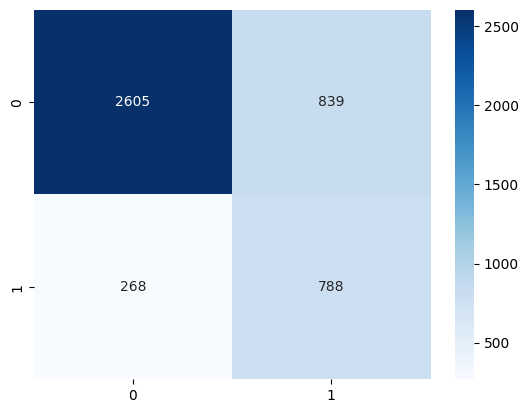

In [20]:
sns.heatmap(c,fmt='d',cmap='Blues',annot=True)